# Agent Based Simulations

## Initilaization and Setup

In [170]:
from mesa import Agent, Model
import pandas as pd
import random
from datetime import datetime, timedelta
from mesa.time import RandomActivation
import re
from collections import Counter
from openai import OpenAI
import seaborn as sns
import numpy as np
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import networkx as nx
from matplotlib.ticker import FuncFormatter

In [2]:
client = OpenAI(api_key="API-key") # Update OpenAI API key here

In [171]:
# Pulling in Channels data
url = 'https://raw.githubusercontent.com/NightlyTwo58/tubetwin/refs/heads/main/data/output/channels_data.csv'
channels_df = pd.read_csv(url,index_col=1)
channels_df

,date,channel_subs,channel_total_views,channel_video_count,channel_cluster
channel_id,,,,,
UCJfJWct8jN1RpCuVWk3zHTA,2025-11-03,695000,54580089,105,0
UC6KbJVFIL97N4N9sNd_HZxQ,2025-11-03,137000,17777475,491,0
UCECtTRy8ZqdD9XSt79Q7i3Q,2025-11-03,74900,39495295,997,0
UC8f2CDyLibpGYSN3O2LfDwg,2025-11-03,2700000,165136638,929,0
UCBriTgjiwqKKcfjOYuzO_bA,2025-11-03,164000,17827973,217,0
UCnoXQZ4krtA96huhCSQkMeg,2025-11-03,649000,195043524,350,0
UCGfUuxBzB8E30XjCjOvji2w,2025-11-03,603000,1009543629,1688,0
UCRzScB0a-dc6OCYYZlP9qpA,2025-11-03,277000,68046439,1544,0
UCN_BLhSa13GWTOZGglrnIZA,2025-11-03,32900,14913363,621,0


In [173]:
# Pulling in Comments data
url = 'https://raw.githubusercontent.com/NightlyTwo58/tubetwin/refs/heads/main/data/output/comments_data.csv'
comments_df = pd.read_csv(url)
comments_df

,date,channel_id,channel_title,channel_description,channel_topics,channel_subs,channel_total_views,channel_video_count,channel_cluster,video_id,video_title,video_description,video_topics,video_views,comment_text,comment_likes
0,2016-01-02,UCECtTRy8ZqdD9XSt79Q7i3Q,BBC Scotland - Comedy,"This is the official Youtube channel for comedy on BBC Scotland, sharing all the best highlights from TV and online content across our channels.\n\nYou can find more comedy on iPlayer here: https://bbc.in/3jQpgcA\n\nVisit our website at http://www.bbc.co.uk/scotland/","https://en.wikipedia.org/wiki/Television_program, https://en.wikipedia.org/wiki/Entertainment, https://en.wikipedia.org/wiki/Film",74900,39495295,997,0,iDkjCfftvdw,The Morning After the Night Before - Rab's First Footer,Rab's been out on the town with Darren Connell (aka Bobby from Scot Squad). His head hurts.\n\nSee more from Rab's First Footer at http://www.bbc.co.uk/programmes/p03chq8s,https://en.wikipedia.org/wiki/Entertainment,1027,TEAM!,0
1,2016-01-02,UCECtTRy8ZqdD9XSt79Q7i3Q,BBC Scotland - Comedy,"This is the official Youtube channel for comedy on BBC Scotland, sharing all the best highlights from TV and online content across our channels.\n\nYou can find more comedy on iPlayer here: https://bbc.in/3jQpgcA\n\nVisit our website at http://www.bbc.co.uk/scotland/","https://en.wikipedia.org/wiki/Television_program, https://en.wikipedia.org/wiki/Entertainment, https://en.wikipedia.org/wiki/Film",74900,39495295,997,0,iDkjCfftvdw,The Morning After the Night Before - Rab's First Footer,Rab's been out on the town with Darren Connell (aka Bobby from Scot Squad). His head hurts.\n\nSee more from Rab's First Footer at http://www.bbc.co.uk/programmes/p03chq8s,https://en.wikipedia.org/wiki/Entertainment,1027,Officer Karen (Bobby),0
2,2016-01-02,UC8f2CDyLibpGYSN3O2LfDwg,Beauty Within,"Beauty Within explores the world of skincare, beauty and wellness. We believe that with more knowledge about all the products out there, as well as our own human body and how it functions uniquely, we’re able to make positive strides to become better versions of ourselves. The hosts take viewers out on adventures and discuss lifestyle topics with industry leaders and experts.\n\n----------------------------\nBlog: https://beautywithinofficial.com/\nOur shop: http://beautywithin.com\nNewsletter: https://bwth.in/newsletter\n\nDon't be a stranger 👻:\nInstagram: https://bwth.in/BeautyWithinOfficial\nFacebook: http://bit.ly/FBBeautyWithin\nReddit: http://reddit.com/r/BeautyWithin\n\nFelicia's IG: https://bwth.in/FeliciaLeeInstagram \nRowena's IG: https://bwth.in/RowenaTsaiInstagram \n\nFor a full list of our recommended products: https://shopmy.us/public/beautywithin/curations\n\n----------------------------\n\nFor business inquiries: collab@beautywithin.com",https://en.wikipedia.org/wiki/Lifestyle_(sociology),2700000,165136638,929,0,1RiE2CiXxxQ,"Best of 2015: Skincare, makeup, hair and memories","Wishing you a Happy New Year my beauties, all my best wishes for 2016 !! For this last 2015 video, (or first 2016 video for some of you who are ahead of time), I took the time to look back on my favorite beauty products, as well as all those big things that happened in my life and shared them with you, hope you'll like it! Let me know your ""Best of 2015"" below ^_~\n\n1. Eve Skincare Bar - www.eveskincare.com/combo\n2. Hourglass Ambient Lighting Palette\n3. Aveda Volumising Tonic\n4. Hello Kitty Peter Alexander PJs\n5. Chanel Gold Necklace\n6. Hello Kitty Toilet Paper\n7. iPad Air 2 in white and gold \n\n\n☞ More Videos: http://bit.ly/10QKLHI \n☞ Check out all deals from Ebates here : http://goo.gl/Doj1R5\n☞ Get 10% with promo code SIGMA2016 off on Sigma Brushes through this link: http://www.sigmabeauty.com/?Click=522702\n\nDon't forget to ask questions, write, or just say hi to me on:\nFACEBOOK: https://www.facebook.com/ABSNTDTV\nINSTAGRAM: ABSNTDTV\nTwitter: ABSNTDTV\n\nSome secrets are better shared than kept, thank

In [174]:
# Cleaning up topic columns
wiki_prefix = "https://en.wikipedia.org/wiki/"

for col in ["channel_topics", "video_topics"]:
    comments_df[col] = (
        comments_df[col]
        .fillna("")  # <- key fix
        .astype(str)
        .str.replace(wiki_prefix, "", regex=False)
    )

comments_df["channel_topics_sorted"] = (
    comments_df["channel_topics"]
    .str.split(",")
    .apply(lambda x: ",".join(sorted(s.strip() for s in x if s.strip())))
)

comments_df["video_topics_sorted"] = (
    comments_df["video_topics"]
    .str.split(",")
    .apply(lambda x: ", ".join(sorted(s.strip() for s in x if s.strip())))
)

In [179]:
# Creating channel level dataframe with all topics associated with channel
channel_topics_df = (
    comments_df
    .dropna(subset=["channel_id", "channel_topics_sorted"])
    .groupby("channel_id")["channel_topics_sorted"]
    .apply(
        lambda x: ",".join(
            sorted(
                set(
                    topic.strip()
                    for cell in x
                    for topic in cell.split(",")
                    if topic.strip()
                )
            )
        )
    )
    .reset_index(name="channel_topics")
)
channel_topics_df

,channel_id,channel_topics
0,UC8f2CDyLibpGYSN3O2LfDwg,Lifestyle_(sociology)
1,UCAhDiBHb37Nyr5RlfUJjlOg,Lifestyle_(sociology)
2,UCECtTRy8ZqdD9XSt79Q7i3Q,"Entertainment,Film,Television_program"
3,UCXuqSBlHAE6Xw-yeJA0Tunw,"Lifestyle_(sociology),Technology"
4,UC_vt34wimdCzdkrzVejwX9g,"Entertainment,Society,Television_program"
5,UCeY0bbntWzzVIaj2z3QigXg,"Politics,Society,Television_program"
6,UCjJE4Aj8YGun0wJ3S7W-RsA,"Fashion,Lifestyle_(sociology)"
7,UCoMdktPbSTixAyNGwb-UYkQ,"Politics,Society"


## Profiling Channels by Cluster

In [182]:
channel_profile = pd.merge(channels_df[['channel_subs','channel_total_views','channel_video_count','channel_cluster']].drop_duplicates(keep='first'), comments_df[["channel_id", "channel_title", "channel_description"]].drop_duplicates(keep='first'), on='channel_id', how='left')
channel_profile = pd.merge(channel_profile, channel_topics_df, on='channel_id', how='left')

In [183]:
channel_profile

,channel_id,channel_subs,channel_total_views,channel_video_count,channel_cluster,channel_title,channel_description,channel_topics
0,UCJfJWct8jN1RpCuVWk3zHTA,695000,54580089,105,0,NaN,NaN,NaN
1,UC6KbJVFIL97N4N9sNd_HZxQ,137000,17777475,491,0,NaN,NaN,NaN
2,UCECtTRy8ZqdD9XSt79Q7i3Q,74900,39495295,997,0,BBC Scotland - Comedy,"This is the official Youtube channel for comedy on BBC Scotland, sharing all the best highlights from TV and online content across our channels.\n\nYou can find more comedy on iPlayer here: https://bbc.in/3jQpgcA\n\nVisit our website at http://www.bbc.co.uk/scotland/","Entertainment,Film,Television_program"
3,UC8f2CDyLibpGYSN3O2LfDwg,2700000,165136638,929,0,Beauty Within,"Beauty Within explores the world of skincare, beauty and wellness. We believe that with more knowledge about all the products out there, as well as our own human body and how it functions uniquely, we’re able to make positive strides to become better versions of ourselves. The hosts take viewers out on adventures and discuss lifestyle topics with industry leaders and experts.\n\n----------------------------\nBlog: https://beautywithinofficial.com/\nOur shop: http://beautywithin.com\nNewsletter: https://bwth.in/newsletter\n\nDon't be a stranger 👻:\nInstagram: https://bwth.in/BeautyWithinOfficial\nFacebook: http://bit.ly/FBBeautyWithin\nReddit: http://reddit.com/r/BeautyWithin\n\nFelicia's IG: https://bwth.in/FeliciaLeeInstagram \nRowena's IG: https://bwth.in/RowenaTsaiInstagram \n\nFor a full list of our recommended products: https://shopmy.us/public/beautywithin/curations\n\n----------------------------\n\nFor business inquiries: collab@beautywithin.com",Lifestyle_(sociology)
4,UCBriTgjiwqKKcfjOYuzO_bA,164000,17827973,217,0,NaN,NaN,NaN
5,UCnoXQZ4krtA96huhCSQkMeg,649000,195043524,350,0,NaN,NaN,NaN
6,UCGfUuxBzB8E30XjCjOvji2w,603000,1009543629,1688,0,NaN,NaN,NaN
7,UCRzScB0a-dc6OCYYZlP9qpA,277000,68046439,1544,0,NaN,NaN,NaN
8,UCN_BLhSa13GWTOZGglrnIZA,32900,14913363,621,0,NaN,NaN,NaN
9,UCwVEhEzsjLym_u1he4XWFkg,3610000,1270129025,748,0,NaN,NaN,NaN


In [184]:
# Taking numeric means at cluster level
cluster_numeric_profile = (
    channel_profile
    .groupby("channel_cluster")
    .agg(
        n_channels=("channel_id", "nunique"),
        mean_subs=("channel_subs", "mean"),
        mean_total_views=("channel_total_views", "mean"),
        mean_video_count=("channel_video_count", "mean"),
    )
    .reset_index()
)

cluster_numeric_profile["mean_total_views"] = (
    cluster_numeric_profile["mean_total_views"]
    .round(0)
    .astype("Int64")
)

cluster_numeric_profile

,channel_cluster,n_channels,mean_subs,mean_total_views,mean_video_count
0,0,20,1295460.0,321632780,918.15
1,1,20,275.0,42389,34.90
2,2,20,11920.1,2089513,553.30
3,3,6,48864545.0,0,0.00
4,4,20,5594350.0,3272467150,32554.80


In [185]:
# Collating topics at cluster level
cluster_titles = (
    channel_profile
    .dropna(subset=["channel_title"])
    .groupby("channel_cluster")["channel_title"]
    .apply(list)
    .reset_index(name="channel_titles")
)

cluster_titles

,channel_cluster,channel_titles
0,0,"[BBC Scotland - Comedy, Beauty Within, KatesBeautyStation, Tammy's Ageless Beauty]"
1,4,"[NBC News, Linus Tech Tips, Geo News, Sky News]"


In [186]:
# Combining numeric and topic informtion at cluster level
cluster_profile = cluster_numeric_profile.merge(
    cluster_titles,
    on="channel_cluster",
    how="left"
)

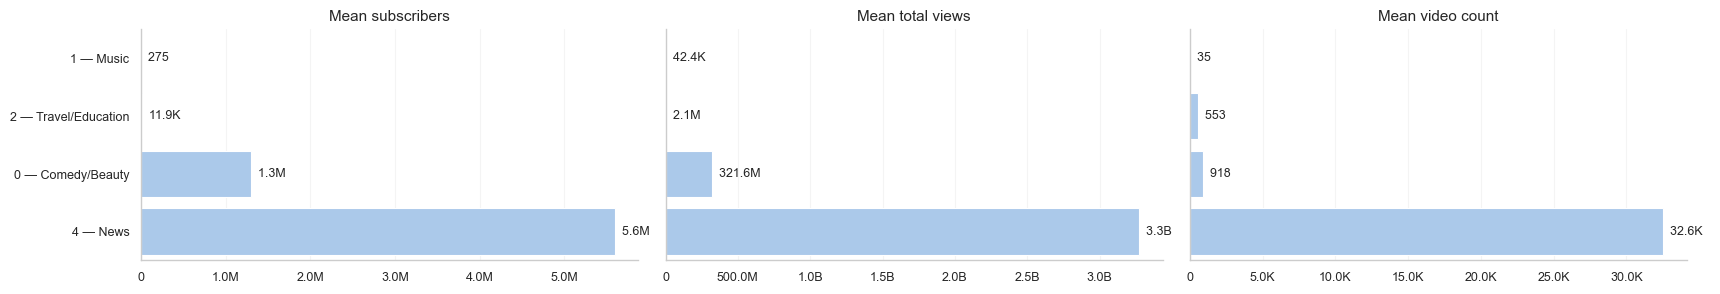

In [201]:
# Cluster profile plots: Setup
def human_format(x, pos=None):
    if pd.isna(x):
        return ""
    x = float(x)
    absx = abs(x)
    if absx >= 1e9:
        return f"{x/1e9:.1f}B"
    if absx >= 1e6:
        return f"{x/1e6:.1f}M"
    if absx >= 1e3:
        return f"{x/1e3:.1f}K"
    return f"{x:.0f}"

cluster_labels = {
    0: "0 — Comedy/Beauty",
    1: "1 — Music",
    2: "2 — Travel/Education",
    4: "4 — News",
}

df = cluster_profile.loc[cluster_profile["channel_cluster"] != 3].copy()
df["cluster_label"] = df["channel_cluster"].map(cluster_labels).fillna(
    "Cluster " + df["channel_cluster"].astype(str)
)

# ensure numeric
for c in ["mean_subs", "mean_total_views", "mean_video_count"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# long format
df_long = df.melt(
    id_vars=["channel_cluster", "cluster_label"],
    value_vars=["mean_subs", "mean_total_views", "mean_video_count"],
    var_name="metric",
    value_name="value"
)

metric_names = {
    "mean_subs": "Mean subscribers",
    "mean_total_views": "Mean total views",
    "mean_video_count": "Mean video count",
}
df_long["metric"] = df_long["metric"].map(metric_names)

# order clusters by views
order = df.sort_values("mean_total_views")["cluster_label"]

In [ ]:
# Cluster profile plots: Plotting
sns.set_theme(
    style="whitegrid",
    context="paper",    
    font_scale=0.9
)

g = sns.catplot(
    data=df_long,
    y="cluster_label",
    x="value",
    col="metric",
    kind="bar",
    order=order,
    # col_wrap=1,
    sharex=False,
    height=3.0,
    aspect=1.9,
    color=sns.color_palette("pastel")[0]         # pastel bars
)

g.set_axis_labels("", "")
g.set_titles("{col_name}", size=11)

# format axes + annotate bars
for ax in g.axes.flatten():
    ax.xaxis.set_major_formatter(FuncFormatter(human_format))
    ax.grid(True, axis="x", alpha=0.2)
    ax.grid(False, axis="y")

    ax.tick_params(axis="both", labelsize=9)

    # annotate bar values
    for p in ax.patches:
        w = p.get_width()
        y = p.get_y() + p.get_height() / 2
        ax.text(
            w, y,
            "  " + human_format(w),
            va="center",
            ha="left",
            fontsize=9  
        )

plt.tight_layout()
plt.show()

In [206]:
channels_sim = channel_profile.dropna(subset=['channel_title','channel_description'], thresh=2)
comments_sim = comments_df[comments_df['channel_id'].isin(channels_sim['channel_id'])]

In [212]:
comments_sim['date'].min()

'2016-01-02'

## Building Channel Agent

In [213]:
class ChannelAgent(Agent):
    STOPWORDS = {
        "the","a","an","and","or","to","of","in","on","for","with","at","by",
        "it","is","this","that","from","as","about","you","your","my","our",
        "we","are","be","i","they","their","he","she","his","her","was","were",
        "video","new","watch","how","why"
    }

    def __init__(self,
                 model,
                 channel_id,
                 channel_title,
                 channel_description,
                 channel_subs,
                 channel_total_views,
                 channel_video_count,
                 upload_history,
                 engagement_history,
                 client):
        # Mesa 3.x style: only pass model to super
        super().__init__(model)

        # Using channel ID as identifier
        self.unique_id = channel_id

        # Channel Identity Metrics
        self.channel_id = channel_id
        self.title = channel_title
        self.description = channel_description
        self.channel_subs = channel_subs
        self.channel_total_views = channel_total_views
        self.channel_video_count = channel_video_count

        # History (memory)
        self.upload_history = upload_history  # DataFrame of past videos
        self.engagement_history = engagement_history  # dict or df

        self.client = client

        # Derived features
        self.upload_frequency = self._compute_upload_frequency()
        self.top_themes = self._extract_top_themes()
        self.recent_engagement_trend = self._compute_engagement_trend()

    # Internal information to make upload decision
    def _compute_upload_frequency(self):
        """Estimate weekly upload frequency from timestamped uploads."""
        if len(self.upload_history) < 2:
            return 0.5  # default: 1 video every 2 weeks

        dates = pd.to_datetime(self.upload_history["date"])
        span_days = (dates.max() - dates.min()).days
        if span_days == 0:
            return 1
        return len(dates) / (span_days / 7)

    def _extract_top_themes(self):
        """Extract meaningful content themes using titles, descriptions, and topics."""
        if len(self.upload_history) == 0:
            return []

        text_blobs = []

        # Title and description
        if "video_title" in self.upload_history.columns:
            text_blobs.extend(self.upload_history["video_title"].dropna().tolist())

        if "video_description" in self.upload_history.columns:
            text_blobs.extend(self.upload_history["video_description"].dropna().tolist())

        # Topics (currently no special weighting; just include them)
        if "video_topics" in self.upload_history.columns:
            topics_list = (
                self.upload_history["video_topics"]
                .dropna()
                .astype(str)
                .str.split(",")
                .explode()
                .str.strip()
                .tolist()
            )
            text_blobs.extend(topics_list)

        # Combine all text
        full_text = " ".join(map(str, text_blobs))

        # Tokenize into words
        tokens = re.findall(r"[A-Za-z0-9']+", full_text.lower())

        # Remove stopwords & very short tokens
        filtered = [t for t in tokens if t not in self.STOPWORDS and len(t) > 3]

        # Count frequency
        counter = Counter(filtered)

        # Return top themes
        top_themes = [word for word, count in counter.most_common(5)]
        return top_themes

    def _compute_engagement_trend(self, window_size: int = 5):
        """
        Compute engagement trend using time:
        - Join upload_history (video_id, date) with engagement_history (video_id -> engagement)
        - Sort by date
        - Compare average engagement in the last N videos vs the previous N videos.
        Returns: "rising", "falling", or "stable".
        """

        # Need both upload history and engagement data
        if len(self.upload_history) == 0 or len(self.engagement_history) == 0:
            return "stable"

        # Ensure required columns exist
        if not {"video_id", "date"}.issubset(self.upload_history.columns):
            return "stable"

        # Build a DataFrame of [video_id, date, engagement]
        df = self.upload_history[["video_id", "date"]].copy()
        df["engagement"] = df["video_id"].map(self.engagement_history)

        # Drop rows with no engagement info
        df = df.dropna(subset=["engagement"])
        if len(df) < 4:
            # too few points to say anything meaningful
            return "stable"

        # Parse dates and sort chronologically
        df["date"] = pd.to_datetime(df["date"], errors="coerce")
        df = df.dropna(subset=["date"]).sort_values("date")

        if len(df) < 4:
            return "stable"

        # Determine window size (can’t exceed half the data)
        n = len(df)
        w = min(window_size, n // 2)
        if w == 0:
            return "stable"

        recent = df.iloc[-w:]
        previous = df.iloc[-2*w:-w]

        recent_avg = recent["engagement"].mean()
        prev_avg = previous["engagement"].mean()

        if prev_avg == 0 and recent_avg == 0:
            return "stable"
        if prev_avg == 0 and recent_avg > 0:
            return "rising"

        # Use relative change with a tolerance
        change = (recent_avg - prev_avg) / abs(prev_avg)

        # Thresholds: +/- 10% change
        if change > 0.1:
            return "rising"
        elif change < -0.1:
            return "falling"
        else:
            return "stable"

    # Calling GPT-5-mini
    def llm_generate_video(self):
        """Call GPT-5-mini to decide upload + generate next video."""
        prompt = self._build_prompt()

        response = self.client.chat.completions.create(
            model="gpt-5-mini",
            messages=[{"role": "user", "content": prompt}],
            # you can re-enable this if you want explicit control:
            # temperature=0.7,
        )

        return response.choices[0].message.content

    # Prompt building using data aabove
    def _build_prompt(self):
        return f"""
You are simulating how a YouTube creator decides what to upload today.

### Channel Identity
- Title: {self.title}
- Description: {self.description}
- Subscribers: {self.channel_subs}
- Total views: {self.channel_total_views}
- Total videos on channel: {self.channel_video_count}

### Behavioral Signals
- Historical upload frequency: {self.upload_frequency:.2f} videos per week
- Top themes from past videos: {self.top_themes}
- Recent engagement trend: {self.recent_engagement_trend}

### Past Engagement (memory)
Use this to infer what the audience responds to:
{self.engagement_history}

### TASK
Propose the next video the creator *would* upload, and provide a probability multiplier.

If they upload, generate:
1. A short, realistic video title  
2. A 1–2 sentence description  
3. The video’s topic/theme  
4. The reasoning behind the choice (based on engagement + identity)  
5. A multiplier (0.5–1.5) that adjusts the BASE upload probability based on context

Rules:
- Base upload probability is determined from historical upload frequency.
- Use the multiplier to slightly increase/decrease the chance today.
- If engagement is falling, they may experiment (10–30% likelihood) by shifting topic.
- Output MUST be pure JSON.

### RETURN FORMAT (strict JSON)
{{
  "title": "...",
  "description": "...",
  "topic": "...",
  "prob_multiplier": 0.5–1.5,
  "rationale": "..."
}}
"""
        
    def _apply_upload_event(self, data):
        vid = f"sim_{self.channel_id}_{self.model.t}"
        sim_date = str(self.model.current_date())

        # 1) add to this agent's upload_history
        new_row = {
            "date": sim_date,
            "video_id": vid,
            "video_title": data.get("title", ""),
            "video_description": data.get("description", ""),
            "video_topics": data.get("topic", ""),
        }
        self.upload_history = pd.concat(
            [self.upload_history, pd.DataFrame([new_row])],
            ignore_index=True
        )

        # 2) register this new video for the EngagementAgent to pick up today
        self.model.new_videos_today.append({
            "channel_id": self.channel_id,
            "channel_title": self.title,
            "channel_description": self.description,
            "channel_topics": None,
            "channel_subs": self.channel_subs,
            "channel_total_views": self.channel_total_views,
            "channel_video_count": self.channel_video_count,
            "channel_cluster": None,
            "video_id": vid,
            "video_title": data.get("title", ""),
            "video_description": data.get("description", ""),
            "video_topics": data.get("topic", ""),
            "video_views": 0,
            "channel_topics_sorted": None,
            "video_topics_sorted": None,
            "engagement_trend": self.recent_engagement_trend,
        })

        # 3) refresh derived features for next timestep
        self.upload_frequency = self._compute_upload_frequency()
        self.top_themes = self._extract_top_themes()
        self.recent_engagement_trend = self._compute_engagement_trend()
    
    def base_upload_prob(self):
        per_day = max(0.0, float(self.upload_frequency)) / 7.0
        step_days = float(getattr(self.model, "step_days", 1))
        return max(0.0, min(1.0, per_day * step_days))
        
    # Mesa
    def step(self):
        llm_output = self.llm_generate_video()
    
        # parse JSON
        try:
            data = json.loads(llm_output)
        except Exception:
            data = {}
    
        base_prob = self.base_upload_prob()
    
        mult = data.get("prob_multiplier", 1.0)
        try:
            mult = float(mult)
        except Exception:
            mult = 1.0
    
        # clamp multiplier and final probability
        mult = max(0.5, min(1.5, mult))
        prob = max(0.0, min(1.0, base_prob * mult))
    
        # sample upload event
        p_draw = self.model.random.random()
        will_upload = p_draw < prob
    
        # if upload happens, update histories + derived features
        if will_upload:
            self._apply_upload_event(data)
    
        # log (use sim time)
        self.model.logs.append({
            "t": self.model.t,
            "sim_date": str(self.model.current_date()),
            "channel_id": self.channel_id,
            "base_prob": base_prob,
            "prob_multiplier": mult,
            "final_prob": prob,
            "sampled_draw": p_draw,
            "will_upload": will_upload,
            "title": data.get("title", ""),
            "description": data.get("description", ""),
            "topic": data.get("topic", ""),
            "rationale": data.get("rationale", ""),
            "raw_llm_output": llm_output,
        })
        # (Later: if will_upload, we can update upload_history + engagement)

## Building Engagement Agent

In [214]:
class EngagementAgent(Agent):
    def __init__(self, model, client):
        super().__init__(model)
        self.client = client

    def step(self):
        """
        For each newly uploaded video today,
        simulate audience engagement using GPT.
        """
        today = str(self.model.current_date())

        # find videos uploaded today
        new_videos = self.model.new_videos_today
        if not new_videos:
            return

        for video in new_videos:
            self.simulate_engagement(video, today)

    def simulate_engagement(self, video, date):
        prompt = self.build_prompt(video)

        response = self.client.chat.completions.create(
            model="gpt-5-mini",
            messages=[{"role": "user", "content": prompt}],
        )

        try:
            data = json.loads(response.choices[0].message.content)
        except Exception:
            return

        comments = data.get("comments", [])
    
        for c in comments:
            self.model.comments_sim = pd.concat(
                [
                    self.model.comments_sim,
                    pd.DataFrame([{
                        "date": date,
                        "channel_id": video["channel_id"],
                        "channel_title": video["channel_title"],
                        "channel_description": video["channel_description"],
                        "channel_topics": video["channel_topics"],
                        "channel_subs": video["channel_subs"],
                        "channel_total_views": video["channel_total_views"],
                        "channel_video_count": video["channel_video_count"],
                        "channel_cluster": video["channel_cluster"],
                        "video_id": video["video_id"],
                        "video_title": video["video_title"],
                        "video_description": video["video_description"],
                        "video_topics": video["video_topics"],
                        "video_views": video["video_views"],
                        "comment_text": c["text"],
                        "comment_likes": int(c.get("likes", 0) or 0),
                        "channel_topics_sorted": video["channel_topics_sorted"],
                        "video_topics_sorted": video["video_topics_sorted"],
                    }])
                ],
                ignore_index=True
            )

    def build_prompt(self, video):
        return f"""
You are simulating audience engagement on a YouTube video.

### Video context
- Channel size (subscribers): {video["channel_subs"]}
- Channel cluster: {video["channel_cluster"]}
- Video title: {video["video_title"]}
- Video topic(s): {video["video_topics"]}
- Recent channel engagement trend: {video["engagement_trend"]}

### Task
Simulate realistic YouTube comments left on this video **today**.

Decide:
- How many comments are posted (0–20)
- What each comment says
- How many likes each comment receives

Rules:
- Popular channels get more comments.
- News videos get more polarized / opinionated comments.
- Comedy/Beauty get shorter, casual comments.
- If engagement trend is falling, fewer comments overall.
- Comment likes should be right-skewed (many with 0–2, a few with higher counts).

### Return STRICT JSON
{{
  "comments": [
    {{
      "text": "comment text",
      "likes": 0
    }}
  ]
}}
"""

## Creating YouTube Model from these agents

In [215]:
class YouTubeModel(Model):
    def __init__(self, channels_sim, comments_sim, client, seed=None,
                 start_date=None, step_days=1):
        super().__init__(seed=seed)

        self.schedule = RandomActivation(self)
        self.logs = []
        self.client = client

        # ---- simulation clock ----
        self.t = 0
        self.step_days = step_days

        # keep a simulated comments table that grows over time
        self.comments_sim = comments_sim.copy()
        self.comments_sim["comment_likes"] = pd.to_numeric(self.comments_sim["comment_likes"], errors="coerce").fillna(0).astype(int)
        self.new_videos_today = []

        # choose start date from your dataset if not provided
        if start_date is None:
            start_date = pd.to_datetime(self.comments_sim["date"]).min()
        self.start_date = pd.to_datetime(start_date)

        # ---- prepare channels_sim index once ----
        self.channels_sim = channels_sim.copy()
        if "channel_id" in self.channels_sim.columns and self.channels_sim.index.name != "channel_id":
            self.channels_sim = self.channels_sim.set_index("channel_id")

        # ---- pick channel ids once (from comments_sim) ----
        channel_ids = self.comments_sim["channel_id"].unique()
        channel_ids = [cid for cid in channel_ids if cid in self.channels_sim.index]

        # ---- create ChannelAgents once ----
        for channel_id in channel_ids:
            row = self.channels_sim.loc[channel_id]

            history = self.comments_sim[self.comments_sim["channel_id"] == channel_id]

            if len(history) > 0:
                upload_history = history[[
                    "date", "video_id", "video_title", "video_description", "video_topics"
                ]].drop_duplicates("video_id").copy()
            else:
                upload_history = pd.DataFrame(columns=[
                    "date", "video_id", "video_title", "video_description", "video_topics"
                ])

            engagement_history = (
                history.groupby("video_id")["comment_likes"].sum().to_dict()
                if len(history) > 0 else {}
            )

            agent = ChannelAgent(
                model=self,
                channel_id=channel_id,
                channel_title=row.get("channel_title", ""),
                channel_description=row.get("channel_description", ""),
                channel_subs=row.get("channel_subs", None),
                channel_total_views=row.get("channel_total_views", None),
                channel_video_count=row.get("channel_video_count", None),
                upload_history=upload_history,
                engagement_history=engagement_history,
                client=self.client
            )
            self.schedule.add(agent)

        # ---- add ONE EngagementAgent once ----
        self.engagement_agent = EngagementAgent(self, client=self.client)

    def current_date(self):
        return (self.start_date + pd.Timedelta(days=self.t * self.step_days)).date()

    def step(self):
        # reset list of "videos uploaded today"
        self.new_videos_today = []

        # run all agents (channels may upload; engagement agent comments on new uploads)
        self.schedule.step()

        # 2) audience engages on videos uploaded today (guaranteed after uploads)
        self.engagement_agent.step()

        # IMPORTANT: sync new engagement back into each channel's engagement_history
        # so trends evolve from the generated comments.
        self._sync_engagement_to_channels()

        # advance clock
        self.t += 1

    def _sync_engagement_to_channels(self):
        """
        Recompute engagement per video from comments_sim and push into each ChannelAgent.
        Engagement = sum(comment_likes) per video_id.
        """
        if len(self.comments_sim) == 0:
            return

        video_eng = self.comments_sim.groupby("video_id")["comment_likes"].sum().to_dict()

        for agent in self.schedule.agents:
            if isinstance(agent, ChannelAgent):
                # update engagement history dict
                agent_vids = set(agent.upload_history["video_id"].dropna().astype(str))
                for vid, eng in video_eng.items():
                    vid_str = str(vid)
                    if vid_str in agent_vids:
                        agent.engagement_history[vid_str] = float(eng)

                # refresh trend now that engagement may have changed
                agent.recent_engagement_trend = agent._compute_engagement_trend()

In [216]:
yt_model = YouTubeModel(channels_sim, comments_sim, client, seed=42, step_days=1)

T = 10
for t in tqdm(range(T), desc="Simulating timesteps"):
    yt_model.step()

logs_df = pd.DataFrame(yt_model.logs)
logs_df.head()

/var/folders/wd/wnb22v4j085_xwp700kyfscr0000gn/T/ipykernel_97267/2957824177.py:6: DeprecationWarning: The time module and all its Schedulers are deprecated and will be removed in Mesa 3.1. They can be replaced with AgentSet functionality. See the migration guide for details. https://mesa.readthedocs.io/latest/migration_guide.html#time-and-schedulers
  self.schedule = RandomActivation(self)


Simulating timesteps:   0%|          | 0/10 [00:00<?, ?it/s]

,t,sim_date,channel_id,base_prob,prob_multiplier,final_prob,sampled_draw,will_upload,title,description,topic,rationale,raw_llm_output
0,0,2016-01-02,UCeY0bbntWzzVIaj2z3QigXg,1.000000,1.10,1.000000,0.736471,True,Major Winter Storm Disrupts Holiday Travel Across U.S.,"A powerful winter storm is causing widespread flight cancellations and dangerous road conditions across multiple states. NBC News brings on-the-ground reporting, travel impacts and safety advice for viewers planning holiday travel.",breaking news — weather / travel,"NBC News' audience expects timely, fact-based coverage of events that affect large numbers of people; winter storms in mid-December fit that identity and typically drive immediate engagement. Historical upload frequency is high (≈18.7 videos/week), engagement is stable, and past clips with concise, actionable updates have performed well, so the channel is likely to publish a short breaking-news/weather report today — therefore a modest boost to today's upload probability (multiplier 1.1).","{\n ""title"": ""Major Winter Storm Disrupts Holiday Travel Across U.S."",\n ""description"": ""A powerful winter storm is causing widespread flight cancellations and dangerous road conditions across multiple states. NBC News brings on-the-ground reporting, travel impacts and safety advice for viewers planning holiday travel."",\n ""topic"": ""breaking news — weather / travel"",\n ""prob_multiplier"": 1.1,\n ""rationale"": ""NBC News' audience expects timely, fact-based coverage of events that affect large numbers of people; winter storms in mid-December fit that identity and typically drive immediate engagement. Historical upload frequency is high (≈18.7 videos/week), engagement is stable, and past clips with concise, actionable updates have performed well, so the channel is likely to publish a short breaking-news/weather report today — therefore a modest boost to today's upload probability (multiplier 1.1).""\n}"
1,0,2016-01-02,UCXuqSBlHAE6Xw-yeJA0Tunw,1.000000,1.10,1.000000,0.676699,True,Stop Leaking Data: Secure Your Router in 10 Minutes,"We walk through the simple settings and inexpensive upgrades that actually stop your router from exposing your devices — no tech degree required. Quick, actionable fixes to improve speed and privacy for any home network.",Home network security / Router setup,"Linus Tech Tips' audience responds well to practical, consumer-facing tech tutorials and troubleshooting — and the channel's top theme signals (http/https) point to interest in networking/security topics. Engagement is currently stable, so the safest bet is a reliable, high-utility how-to rather than a big experimental pivot. A short, inexpensive-to-produce network security video fits the channel identity, matches past view performance for similar topics, and slightly increases today's upload likelihood (multiplier 1.1) while keeping within the usual daily posting cadence.","{\n ""title"": ""Stop Leaking Data: Secure Your Router in 10 Minutes"",\n ""description"": ""We walk through the simple settings and inexpensive upgrades that actually stop your router from exposing your devices — no tech degree required. Quick, actionable fixes to improve speed and privacy for any home network."",\n ""topic"": ""Home network security / Router setup"",\n ""prob_multiplier"": 1.1,\n ""rationale"": ""Linus Tech Tips' audience responds well to practical, consumer-facing tech tutorials and troubleshooting — and the channel's top theme signals (http/https) point to interest in networking/security topics. Engagement is currently stable, so the safest bet is a reliable, high-utility how-to rather than a big experimental pivot. A short, inexpensive-to-produce network security video fits the channel identity, matches past view performance for similar topics, and slightly increases today's upload likelihood (multiplier 1.1) while keeping within the usual daily posting cadence.""\n}"
2,0,2016-01-02,UCoMdktPbSTixAyNGwb-UYkQ,1.000000,1.12,1.000000,0

In [224]:
logs_df["t"] = pd.to_numeric(logs_df["t"], errors="coerce")
logs_df["channel_id"] = logs_df["channel_id"].astype(str)

# reconstruct video_id only when an upload happened
logs_df["video_id"] = np.where(
    logs_df["will_upload"] == True,
    "sim_" + logs_df["channel_id"] + "_" + logs_df["t"].astype("Int64").astype(str),
    pd.NA
)

## KPIS

In [225]:
comments_sim = yt_model.comments_sim.copy()
comments_sim["date"] = pd.to_datetime(comments_sim["date"], errors="coerce")

uploads = logs_df[logs_df["will_upload"] == True].copy()
uploads["sim_date"] = pd.to_datetime(uploads["sim_date"], errors="coerce")

video_eng = (
    comments_sim.groupby(["video_id", "channel_id"], as_index=False)
    .agg(
        n_comments=("comment_text", "count"),
        likes_sum=("comment_likes", "sum"),
        likes_mean=("comment_likes", "mean"),
        likes_median=("comment_likes", "median"),
        likes_p90=("comment_likes", lambda x: x.quantile(0.90)),
    )
)

uploads_kpi = uploads.merge(video_eng, on=["video_id", "channel_id"], how="left")
for c in ["n_comments","likes_sum","likes_mean","likes_median","likes_p90"]:
    uploads_kpi[c] = uploads_kpi[c].fillna(0)

### Upload Frequency

In [241]:
u = uploads.sort_values(["channel_id","sim_date"]).copy()
u["gap_days"] = u.groupby("channel_id")["sim_date"].diff().dt.days

upload_regularity = (
    u.dropna(subset=["gap_days"])
     .groupby("channel_id")["gap_days"]
     .agg(gap_mean="mean", gap_std="std", n_gaps="count")
     .reset_index()
)
upload_regularity["gap_cv"] = upload_regularity["gap_std"] / upload_regularity["gap_mean"]
upload_regularity

,channel_id,gap_mean,gap_std,n_gaps,gap_cv
0,UC8f2CDyLibpGYSN3O2LfDwg,1.000,0.000000,8,0.000000
1,UCXuqSBlHAE6Xw-yeJA0Tunw,1.000,0.000000,9,0.000000
2,UC_vt34wimdCzdkrzVejwX9g,1.000,0.000000,9,0.000000
3,UCeY0bbntWzzVIaj2z3QigXg,1.125,0.353553,8,0.314270
4,UCjJE4Aj8YGun0wJ3S7W-RsA,1.500,0.707107,2,0.471405
5,UCoMdktPbSTixAyNGwb-UYkQ,1.000,0.000000,9,0.000000


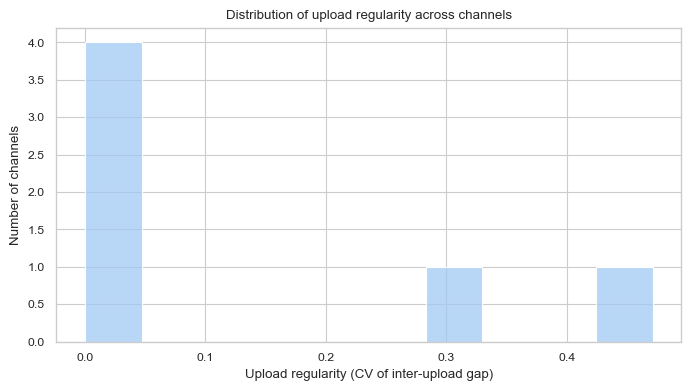

In [279]:
sns.set_theme(style="whitegrid", context="paper")

plt.figure(figsize=(7,4))
sns.histplot(
    upload_regularity["gap_cv"],
    bins=10,
    color=sns.color_palette("pastel")[0],
    edgecolor="white"
)

plt.xlabel("Upload regularity (CV of inter-upload gap)")
plt.ylabel("Number of channels")
plt.title("Distribution of upload regularity across channels")
plt.tight_layout()
plt.savefig("/Users/SandyPops/Desktop/SYSEN 5530/Final project/upload_regularity.png")
plt.show()

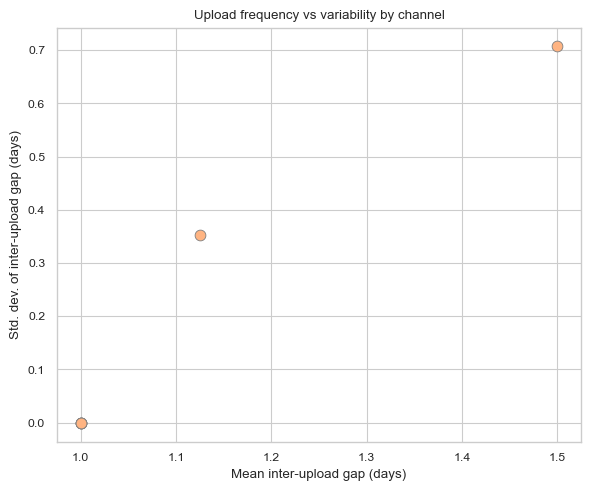

In [280]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=upload_regularity,
    x="gap_mean",
    y="gap_std",
    s=60,
    color=sns.color_palette("pastel")[1],
    edgecolor="gray"
)

plt.xlabel("Mean inter-upload gap (days)")
plt.ylabel("Std. dev. of inter-upload gap (days)")
plt.title("Upload frequency vs variability by channel")
plt.tight_layout()
plt.savefig("/Users/SandyPops/Desktop/SYSEN 5530/Final project/upload_freq_versus_var.png")
plt.show()

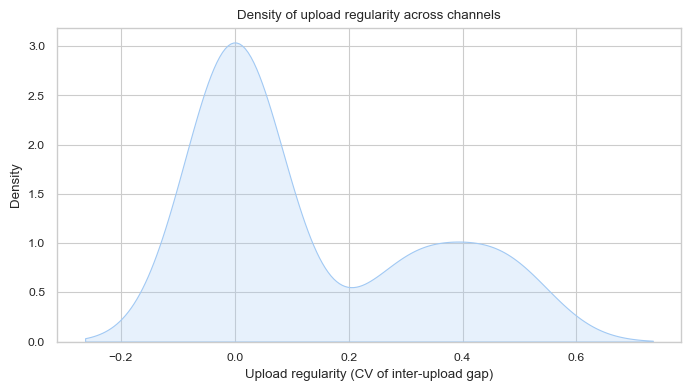

In [281]:
plt.figure(figsize=(7,4))
sns.kdeplot(
    upload_regularity["gap_cv"],
    fill=True,
    color=sns.color_palette("pastel")[0],
    bw_adjust=0.6
)

plt.xlabel("Upload regularity (CV of inter-upload gap)")
plt.ylabel("Density")
plt.title("Density of upload regularity across channels")
plt.tight_layout()
plt.savefig("/Users/SandyPops/Desktop/SYSEN 5530/Final project/upload_regularity_density.png")
plt.show()

### Engagement Skew

In [257]:
video_skew = (
    comments_sim.groupby(["video_id","channel_id"])["comment_likes"]
    .agg(median="median", p90=lambda x: x.quantile(0.90))
    .reset_index()
)
video_skew["skew_p90_over_median"] = video_skew["p90"] / (video_skew["median"] + 1)

engagement_skew = (
    video_skew.groupby("channel_id")["skew_p90_over_median"]
    .mean()
    .reset_index(name="avg_skew_p90_over_median")
)
engagement_skew

,channel_id,avg_skew_p90_over_median
0,UC8f2CDyLibpGYSN3O2LfDwg,26.558596
1,UCAhDiBHb37Nyr5RlfUJjlOg,0.100000
2,UCECtTRy8ZqdD9XSt79Q7i3Q,0.000000
3,UCXuqSBlHAE6Xw-yeJA0Tunw,52.194773
4,UC_vt34wimdCzdkrzVejwX9g,200.762280
5,UCeY0bbntWzzVIaj2z3QigXg,21.208397
6,UCjJE4Aj8YGun0wJ3S7W-RsA,5.063462
7,UCoMdktPbSTixAyNGwb-UYkQ,22.433922


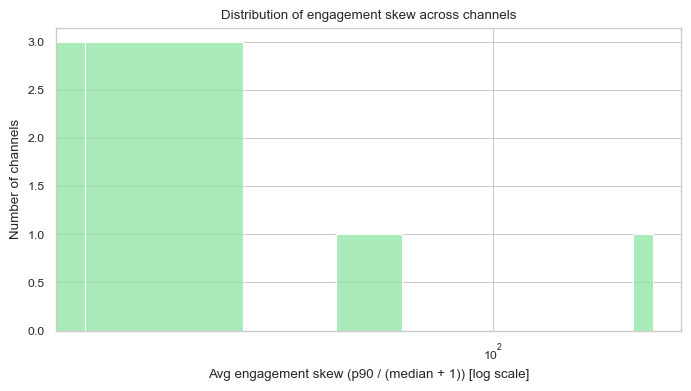

In [282]:
sns.set_theme(style="whitegrid", context="paper")

df = engagement_skew.copy()

plt.figure(figsize=(7,4))
sns.histplot(
    df["avg_skew_p90_over_median"],
    bins=12,
    color=sns.color_palette("pastel")[2],
    edgecolor="white"
)

plt.xscale("log")
plt.xlabel("Avg engagement skew (p90 / (median + 1)) [log scale]")
plt.ylabel("Number of channels")
plt.title("Distribution of engagement skew across channels")
plt.tight_layout()
plt.savefig("/Users/SandyPops/Desktop/SYSEN 5530/Final project/engagement_skew_dist.png")
plt.show()

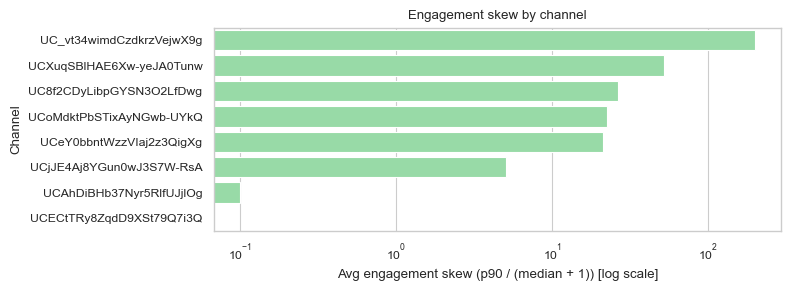

In [283]:
df = engagement_skew.sort_values("avg_skew_p90_over_median", ascending=False).copy()

plt.figure(figsize=(8, max(3, 0.35 * len(df))))
sns.barplot(
    data=df,
    y="channel_id",
    x="avg_skew_p90_over_median",
    color=sns.color_palette("pastel")[2]
)

plt.xscale("log")
plt.xlabel("Avg engagement skew (p90 / (median + 1)) [log scale]")
plt.ylabel("Channel")
plt.title("Engagement skew by channel")
plt.tight_layout()
plt.savefig("/Users/SandyPops/Desktop/SYSEN 5530/Final project/engagement_skew_by_channel.png")
plt.show()

### Engagement Responsiveness

In [235]:
tmp = uploads_kpi.copy()
tmp = tmp.dropna(subset=["final_prob"]).copy()
tmp["prob_bin"] = pd.qcut(tmp["final_prob"], q=3, duplicates="drop")  # low/med/high

resp_bins = (
    tmp.groupby(["channel_id", "prob_bin"])["likes_sum"]
        .mean()
        .reset_index()
)
resp_bins

/var/folders/wd/wnb22v4j085_xwp700kyfscr0000gn/T/ipykernel_97267/2758024238.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby(["channel_id", "prob_bin"])["likes_sum"]


,channel_id,prob_bin,likes_sum
0,UC8f2CDyLibpGYSN3O2LfDwg,"(0.0811, 1.0]",973.000000
1,UCXuqSBlHAE6Xw-yeJA0Tunw,"(0.0811, 1.0]",3811.900000
2,UC_vt34wimdCzdkrzVejwX9g,"(0.0811, 1.0]",10746.700000
3,UCeY0bbntWzzVIaj2z3QigXg,"(0.0811, 1.0]",2222.777778
4,UCjJE4Aj8YGun0wJ3S7W-RsA,"(0.0811, 1.0]",217.666667
5,UCoMdktPbSTixAyNGwb-UYkQ,"(0.0811, 1.0]",3663.600000


/var/folders/wd/wnb22v4j085_xwp700kyfscr0000gn/T/ipykernel_97267/3145220232.py:7: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.barplot(


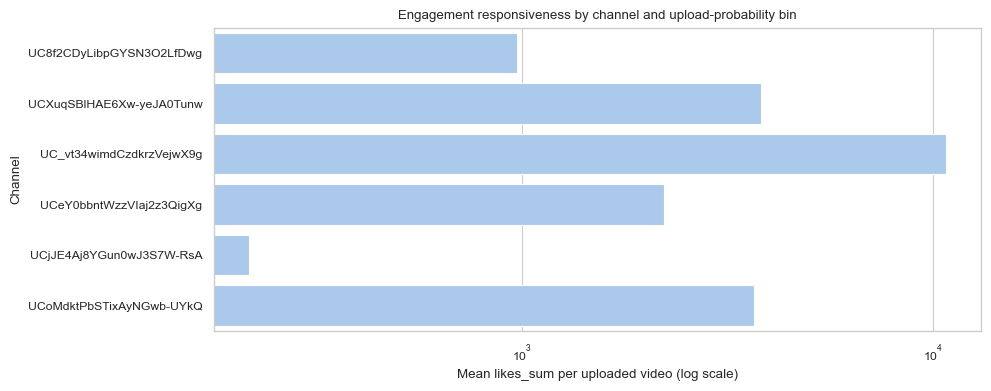

In [284]:
df = resp_bins.copy()

# make bins sort nicely on the axis
df["prob_bin_str"] = df["prob_bin"].astype(str)

plt.figure(figsize=(10, max(4, 0.45 * df["channel_id"].nunique())))
sns.barplot(
    data=df,
    y="channel_id",
    x="likes_sum",
    hue="prob_bin_str",
    palette=sns.color_palette("pastel")
)

plt.xscale("log")
plt.xlabel("Mean likes_sum per uploaded video (log scale)")
plt.ylabel("Channel")
plt.title("Engagement responsiveness by channel and upload-probability bin")
plt.legend().remove()
plt.tight_layout()
plt.savefig("/Users/SandyPops/Desktop/SYSEN 5530/Final project/engagement_responsiveness.png")
plt.show()

### Content Persistence

In [249]:
TOPIC_MAP = {
    # Beauty / Skincare
    "skincare": [
        "skincare", "skin care", "beauty", "makeup", "anti-aging",
        "ingredient", "ingredients", "vitamin", "niacinamide",
        "routine", "layering", "product", "products", "haul",
        "affiliate", "sephora", "nordstrom"
    ],

    # Home networking & consumer tech
    "home_networking": [
        "home network", "home networking", "router", "wi-fi", "wifi",
        "mesh", "isp", "gateway", "dns", "pi-hole",
        "network", "networking", "router setup", "router settings",
        "wi-fi", "wi-fi", "performance testing"
    ],

    # Web / cybersecurity
    "web_security": [
        "web security", "https", "http", "phishing", "malicious",
        "browser privacy", "privacy", "security", "dns-over-https"
    ],

    # News: politics, economy, current events
    "news": [
        "news", "breaking", "headlines", "roundup", "bulletin",
        "politics", "political", "election", "government",
        "economy", "economic", "current events", "live coverage",
        "pakistan", "uk"
    ],

    # Weather / travel disruptions
    "weather_travel": [
        "weather", "travel", "disruption", "public safety",
        "severe weather"
    ],

    # Technology & social media policy
    "tech_policy": [
        "technology", "tech news", "social media",
        "twitter", "x/", "policy", "platform", "explainer"
    ],
}

def map_topic_to_bucket(topic):
    if pd.isna(topic):
        return None
    t = topic.lower()
    for bucket, keywords in TOPIC_MAP.items():
        if any(k in t for k in keywords):
            return bucket
    return "other"

In [251]:
p = uploads.sort_values(["channel_id", "t"]).copy()

p["topic_bucket"] = p["topic"].apply(map_topic_to_bucket)
p["topic_bucket_prev"] = p.groupby("channel_id")["topic_bucket"].shift(1)

p["topic_repeat"] = (p["topic_bucket"] == p["topic_bucket_prev"]).astype(int)

content_persistence = (
    p.dropna(subset=["topic_bucket_prev"])
     .groupby("channel_id")["topic_repeat"]
     .mean()
     .reset_index(name="topic_repeat_rate")
)

content_persistence

,channel_id,topic_repeat_rate
0,UC8f2CDyLibpGYSN3O2LfDwg,1.000000
1,UCXuqSBlHAE6Xw-yeJA0Tunw,0.777778
2,UC_vt34wimdCzdkrzVejwX9g,1.000000
3,UCeY0bbntWzzVIaj2z3QigXg,1.000000
4,UCjJE4Aj8YGun0wJ3S7W-RsA,1.000000
5,UCoMdktPbSTixAyNGwb-UYkQ,1.000000


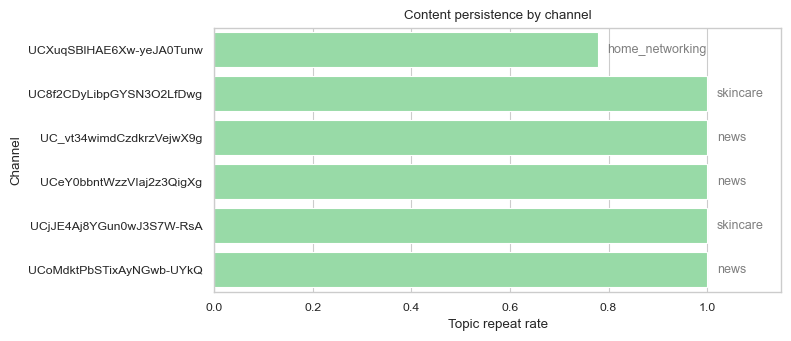

In [285]:
# dominant topic per channel
dominant_topic = (
    p.groupby("channel_id")["topic_bucket"]
     .agg(lambda x: x.value_counts().idxmax())
     .reset_index(name="dominant_topic")
)

# merge into content_persistence
df = content_persistence.merge(dominant_topic, on="channel_id", how="left")
df = df.sort_values("topic_repeat_rate")

sns.set_theme(style="whitegrid", context="paper")

plt.figure(figsize=(8, max(3.5, 0.4 * len(df))))

ax = sns.barplot(
    data=df,
    y="channel_id",
    x="topic_repeat_rate",
    color=sns.color_palette("pastel")[2]
)

plt.xlim(0, 1.15)
plt.xlabel("Topic repeat rate")
plt.ylabel("Channel")
plt.title("Content persistence by channel")

# annotate dominant topic
for i, row in df.iterrows():
    ax.text(
        row["topic_repeat_rate"] + 0.02,
        list(df.index).index(i),
        row["dominant_topic"],
        va="center",
        fontsize=9,
        color="gray"
    )

plt.tight_layout()
plt.savefig("/Users/SandyPops/Desktop/SYSEN 5530/Final project/content_persistence.png")
plt.show()

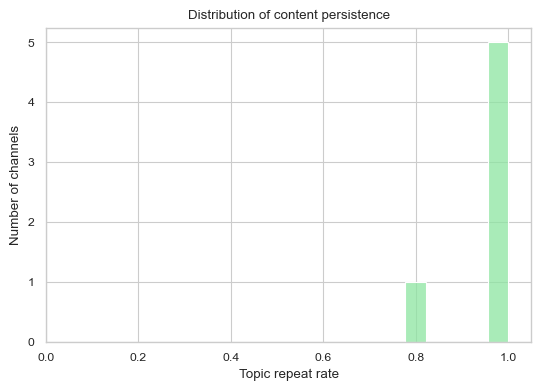

In [286]:
plt.figure(figsize=(5.5,4))
sns.histplot(
    content_persistence["topic_repeat_rate"],
    bins=5,
    kde=False,
    color=sns.color_palette("pastel")[2]
)

plt.xlim(0, 1.05)
plt.xlabel("Topic repeat rate")
plt.ylabel("Number of channels")
plt.title("Distribution of content persistence")
plt.tight_layout()
plt.savefig("/Users/SandyPops/Desktop/SYSEN 5530/Final project/topic_repeat_channel_count.png")
plt.show()

### System activity rate 

In [253]:
uploads_per_day = (
    uploads.groupby(uploads["sim_date"].dt.date)
    .size().reset_index(name="uploads_count")
    .rename(columns={"sim_date":"date"})
)

comments_per_day = (
    comments_sim.groupby(comments_sim["date"].dt.date)
    .size().reset_index(name="comments_count")
    .rename(columns={"date":"date"})
)

likes_per_day = (
    comments_sim.groupby(comments_sim["date"].dt.date)["comment_likes"]
    .sum().reset_index(name="likes_count")
    .rename(columns={"date":"date"})
)

system_activity = uploads_per_day.merge(comments_per_day, on="date", how="outer").merge(likes_per_day, on="date", how="outer").fillna(0)
system_activity

,date,uploads_count,comments_count,likes_count
0,2016-01-02,4,286,36575
1,2016-01-03,5,72,8290
2,2016-01-04,5,112,19945
3,2016-01-05,5,116,74133
4,2016-01-06,5,61,46308
5,2016-01-07,5,67,11129
6,2016-01-08,5,70,12968
7,2016-01-09,6,78,32261
8,2016-01-10,5,73,38085
9,2016-01-11,6,81,15199


In [288]:
df = system_activity.copy()
df["date"] = pd.to_datetime(df["date"])

# df_long = df.melt(
#     id_vars="date",
#     value_vars=["uploads_count", "comments_count", "likes_count"],
#     var_name="metric",
#     value_name="count"
# )

# metric_labels = {
#     "uploads_count": "Uploads",
#     "comments_count": "Comments",
#     "likes_count": "Likes"
# }
# df_long["metric"] = df_long["metric"].map(metric_labels)

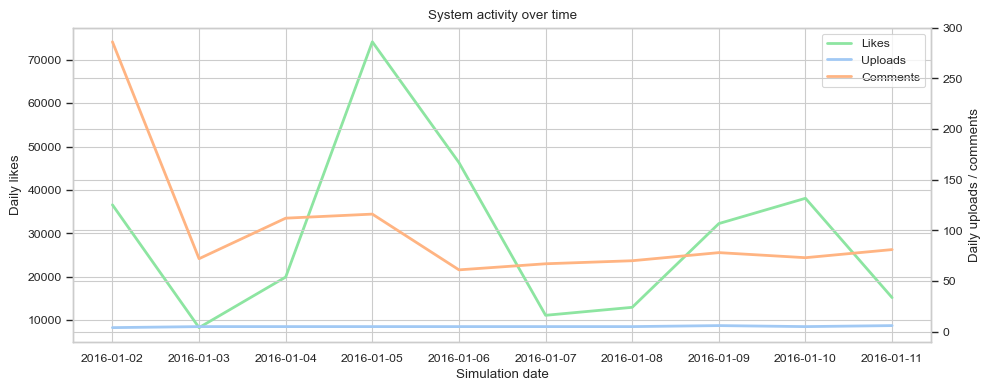

In [289]:
sns.set_theme(style="whitegrid", context="paper")

fig, ax1 = plt.subplots(figsize=(10, 4))

# Primary axis
sns.lineplot(
    data=df,
    x="date",
    y="likes_count",
    ax=ax1,
    color=sns.color_palette("pastel")[2],
    linewidth=2,
    label="Likes",
    legend=False   # ⬅️ important
)

ax1.set_ylabel("Daily likes")

# Secondary axis
ax2 = ax1.twinx()

sns.lineplot(
    data=df,
    x="date",
    y="uploads_count",
    ax=ax2,
    color=sns.color_palette("pastel")[0],
    linewidth=2,
    label="Uploads",
    legend=False
)

sns.lineplot(
    data=df,
    x="date",
    y="comments_count",
    ax=ax2,
    color=sns.color_palette("pastel")[1],
    linewidth=2,
    label="Comments",
    legend=False
)

ax2.set_ylabel("Daily uploads / comments")

# Legend (to avoid duplicates)
handles = [
    plt.Line2D([0], [0], color=sns.color_palette("pastel")[2], lw=2),
    plt.Line2D([0], [0], color=sns.color_palette("pastel")[0], lw=2),
    plt.Line2D([0], [0], color=sns.color_palette("pastel")[1], lw=2),
]
labels = ["Likes", "Uploads", "Comments"]

ax1.legend(handles, labels, loc="upper right", frameon=True)

ax1.set_xlabel("Simulation date")
ax1.set_title("System activity over time")

plt.tight_layout()
plt.savefig("/Users/SandyPops/Desktop/SYSEN 5530/Final project/system_activity.png")
plt.show()

In [276]:
# TBALE WITH ALL KPIS 
# Channel uploads
uploads_per_channel = (
    uploads.groupby("channel_id")
    .size()
    .reset_index(name="n_uploads")
)

# Engagement Responsiveness
engagement_resp = (
    resp_bins
    .rename(columns={"likes_sum": "avg_likes_high_prob"})
    .drop(columns=["prob_bin"])
)

# Merge
kpi_table = (
    upload_regularity
    .merge(engagement_skew, on="channel_id", how="left")
    .merge(content_persistence, on="channel_id", how="left")
    .merge(uploads_per_channel, on="channel_id", how="left")
    .merge(engagement_resp, on="channel_id", how="left")
)

# Formatting
kpi_table = kpi_table[
    [
        "channel_id",
        "gap_mean",
        "gap_cv",
        "avg_skew_p90_over_median",
        "avg_likes_high_prob",
        "topic_repeat_rate",
        "n_uploads",
    ]
].round(2)

kpi_table

,channel_id,gap_mean,gap_cv,avg_skew_p90_over_median,avg_likes_high_prob,topic_repeat_rate,n_uploads
0,UC8f2CDyLibpGYSN3O2LfDwg,1.00,0.00,26.56,973.00,1.00,9
1,UCXuqSBlHAE6Xw-yeJA0Tunw,1.00,0.00,52.19,3811.90,0.78,10
2,UC_vt34wimdCzdkrzVejwX9g,1.00,0.00,200.76,10746.70,1.00,10
3,UCeY0bbntWzzVIaj2z3QigXg,1.12,0.31,21.21,2222.78,1.00,9
4,UCjJE4Aj8YGun0wJ3S7W-RsA,1.50,0.47,5.06,217.67,1.00,3
5,UCoMdktPbSTixAyNGwb-UYkQ,1.00,0.00,22.43,3663.60,1.00,10


In [278]:
# Generating latex code for above table
latex_table = kpi_table.to_latex(
    index=False,
    longtable=False,
    caption="Summary of simulated channel-level performance metrics",
    label="tab:channel_kpis",
    column_format="lrrrrrr",
    escape=True
)

print(latex_table)

\begin{table}
\caption{Summary of simulated channel-level performance metrics}
\label{tab:channel_kpis}
\begin{tabular}{lrrrrrr}
\toprule
channel\_id & gap\_mean & gap\_cv & avg\_skew\_p90\_over\_median & avg\_likes\_high\_prob & topic\_repeat\_rate & n\_uploads \\
\midrule
UC8f2CDyLibpGYSN3O2LfDwg & 1.000000 & 0.000000 & 26.560000 & 973.000000 & 1.000000 & 9 \\
UCXuqSBlHAE6Xw-yeJA0Tunw & 1.000000 & 0.000000 & 52.190000 & 3811.900000 & 0.780000 & 10 \\
UC\_vt34wimdCzdkrzVejwX9g & 1.000000 & 0.000000 & 200.760000 & 10746.700000 & 1.000000 & 10 \\
UCeY0bbntWzzVIaj2z3QigXg & 1.120000 & 0.310000 & 21.210000 & 2222.780000 & 1.000000 & 9 \\
UCjJE4Aj8YGun0wJ3S7W-RsA & 1.500000 & 0.470000 & 5.060000 & 217.670000 & 1.000000 & 3 \\
UCoMdktPbSTixAyNGwb-UYkQ & 1.000000 & 0.000000 & 22.430000 & 3663.600000 & 1.000000 & 10 \\
\bottomrule
\end{tabular}
\end{table}



## APPENDIX: Output Sanity Checks & Viz. 

In [223]:
logs_df[["t", "channel_id", "will_upload", "final_prob", "title"]].head(20)

,t,channel_id,will_upload,final_prob,title
0,0,UCeY0bbntWzzVIaj2z3QigXg,True,1.000000,Major Winter Storm Disrupts Holiday Travel Across U.S.
1,0,UCXuqSBlHAE6Xw-yeJA0Tunw,True,1.000000,Stop Leaking Data: Secure Your Router in 10 Minutes
2,0,UCoMdktPbSTixAyNGwb-UYkQ,True,1.000000,X confirms sweeping verification and API changes
3,0,UCAhDiBHb37Nyr5RlfUJjlOg,False,0.082143,My Christmas Fragrance Gift Guide 2025 | Best Perfumes & Stocking Fillers
4,0,UCjJE4Aj8YGun0wJ3S7W-RsA,False,0.082143,Everyday Makeup for Mature Skin — Sephora + Amazon Favorites
5,0,UC_vt34wimdCzdkrzVejwX9g,True,1.000000,Geo News Live: Top Headlines — Pakistan & World
6,0,UCECtTRy8ZqdD9XSt79Q7i3Q,False,0.078571,Rab C. Nesbitt – Morning After Rant (Best Bits)
7,0,UC8f2CDyLibpGYSN3O2LfDwg,False,0.085714,"Winter Skincare Routine 2025 — Top Products to Beat Dry, Flaky Skin"
8,1,UCoMdktPbSTixAyNGwb-UYkQ,True,1.000000,Sky News Tonight — Latest headlines and breaking updates
9,1,UC_vt34wimdCzdkrzVejwX9g,True,1.000000,Breaking News: Major Political Developments in Islamabad — Live Updates


In [218]:
logs_df.query("will_upload").shape

(51, 13)

In [219]:
yt_model.comments_sim.tail(10)

,date,channel_id,channel_title,channel_description,channel_topics,channel_subs,channel_total_views,channel_video_count,channel_cluster,video_id,video_title,video_description,video_topics,video_views,comment_text,comment_likes,channel_topics_sorted,video_topics_sorted
1006,2016-01-11,UC8f2CDyLibpGYSN3O2LfDwg,Beauty Within,"Beauty Within explores the world of skincare, beauty and wellness. We believe that with more knowledge about all the products out there, as well as our own human body and how it functions uniquely, we’re able to make positive strides to become better versions of ourselves. The hosts take viewers out on adventures and discuss lifestyle topics with industry leaders and experts.\n\n----------------------------\nBlog: https://beautywithinofficial.com/\nOur shop: http://beautywithin.com\nNewsletter: https://bwth.in/newsletter\n\nDon't be a stranger 👻:\nInstagram: https://bwth.in/BeautyWithinOfficial\nFacebook: http://bit.ly/FBBeautyWithin\nReddit: http://reddit.com/r/BeautyWithin\n\nFelicia's IG: https://bwth.in/FeliciaLeeInstagram \nRowena's IG: https://bwth.in/RowenaTsaiInstagram \n\nFor a full list of our recommended products: https://shopmy.us/public/beautywithin/curations\n\n----------------------------\n\nFor business inquiries: collab@beautywithin.com",None,2700000,165136638,929,None,sim_UC8f2CDyLibpGYSN3O2LfDwg_9,Niacinamide Mistakes You're Making — Derm Explains,"We break down the top niacinamide mistakes (and how to fix them) with a dermatologist — from layering to concentrations and who should avoid it. Quick, evidence-based tips + product recs to make your routine actually work.",niacinamide / skincare ingredients / routine,0,"Can you recommend a good concentration for oily, acne-prone skin? 2% vs 5%?",120,None,None
1007,2016-01-11,UC8f2CDyLibpGYSN3O2LfDwg,Beauty Within,"Beauty Within explores the world of skincare, beauty and wellness. We believe that with more knowledge about all the products out there, as well as our own human body and how it functions uniquely, we’re able to make positive strides to become better versions of ourselves. The hosts take viewers out on adventures and discuss lifestyle topics with industry leaders and experts.\n\n----------------------------\nBlog: https://beautywithinofficial.com/\nOur shop: http://beautywithin.com\nNewsletter: https://bwth.in/newsletter\n\nDon't be a stranger 👻:\nInstagram: https://bwth.in/BeautyWithinOfficial\nFacebook: http://bit.ly/FBBeautyWithin\nReddit: http://reddit.com/r/BeautyWithin\n\nFelicia's IG: https://bwth.in/FeliciaLeeInstagram \nRowena's IG: https://bwth.in/RowenaTsaiInstagram \n\nFor a full list of our recommended products: https://shopmy.us/public/beautywithin/curations\n\n----------------------------\n\nFor business inquiries: collab@beautywithin.com",None,2700000,165136638,929,None,sim_UC8f2CDyLibpGYSN3O2LfDwg_9,Niacinamide Mistakes You're Making — Derm Explains,"We break down the top niacinamide mistakes (and how to fix them) with a dermatologist — from layering to concentrations and who should avoid it. Quick, evidence-based tips + product recs to make your routine actually work.",niacinamide / skincare ingredients / routine,0,Why does my skin purge when I start niacinamide? Is that normal or am I reacting to something else?,60,None,None
1008,2016-01-11,UC8f2CDyLibpGYSN3O2LfDwg,Beauty Within,"Beauty Within explores the world of skincare, beauty and wellness. We believe that with more knowledge about all the products out there, as well as our own human body and how it functions uniquely, we’re able to make positive strides to become better versions of ourselves. The hosts take viewers out on adventures and discuss lifestyle topics with industry leaders and experts.\n\n----------------------------\nBlog: https://beautywithinofficial.com/\nOur shop: http://beautywithin.com\nNewsletter: https://bwth.in/newsletter\n\nDon't be a stranger 👻:\nInstagram: https://bwth.in/BeautyWithinOfficial\nFacebook: http://bit.ly/FBBeautyWithin\nReddit

In [220]:
agent = [a for a in yt_model.schedule.agents if isinstance(a, ChannelAgent)][0]
agent.engagement_history

{'iDkjCfftvdw': 0.0}

In [221]:
yt_model.comments_sim.groupby("date")["comment_likes"].sum()

date
2016-01-02    36575
2016-01-03     8290
2016-01-04    19945
2016-01-05    74133
2016-01-06    46308
2016-01-07    11129
2016-01-08    12968
2016-01-09    32261
2016-01-10    38085
2016-01-11    15199
Name: comment_likes, dtype: int64

In [222]:
logs_df["timestep"] = logs_df.groupby("channel_id").cumcount()

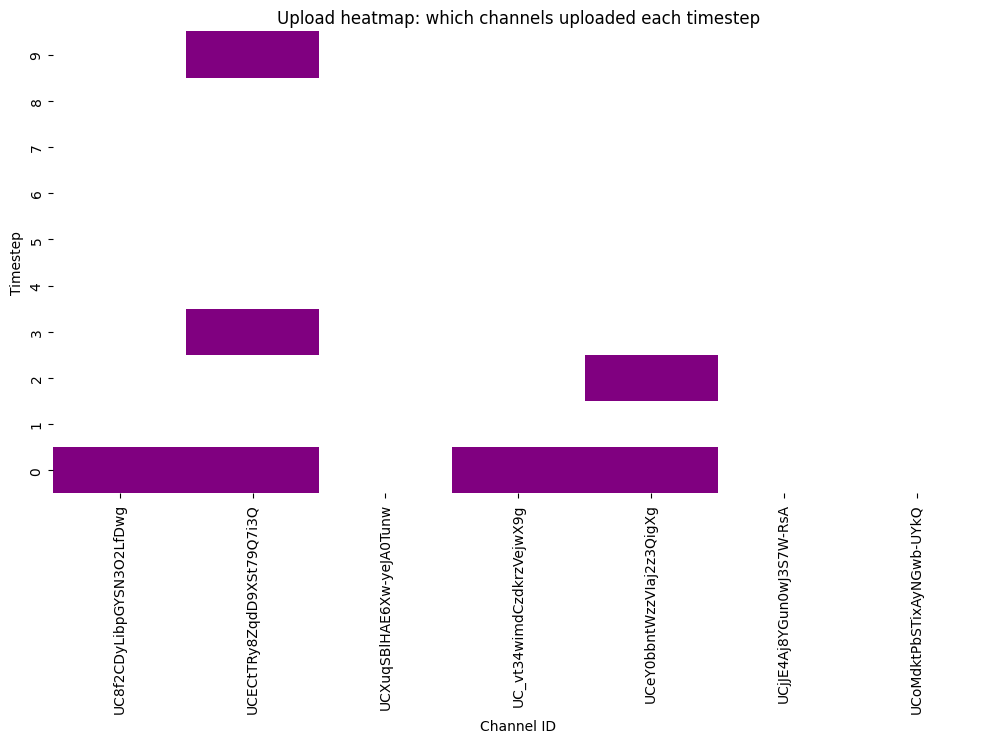

In [77]:
heat_df = logs_df.copy()

heat_pivot = (
    heat_df
    .pivot(index="timestep", columns="channel_id", values="will_upload")
    .fillna(False)
    .astype(int)
)

heat_pivot_flipped = heat_pivot.iloc[::-1]

plt.figure(figsize=(12, 6))
# sns.heatmap(heat_pivot, cmap="Greens", cbar=True)
sns.heatmap(
    heat_pivot_flipped,
    cmap=["white", "purple"],  
    cbar=False
)
plt.title("Upload heatmap: which channels uploaded each timestep")
plt.xlabel("Channel ID")
plt.ylabel("Timestep")
plt.show()

In [73]:
# 1. Pick a channel (strip in case of trailing whitespace)
channel_id = "UCeY0bbntWzzVIaj2z3QigXg".strip()

# If this channel never uploaded in the simulation, pick one that did:
if not ((logs_df["channel_id"] == channel_id) & (logs_df["will_upload"])).any():
    if logs_df["will_upload"].any():
        channel_id = logs_df[logs_df["will_upload"]]["channel_id"].iloc[0]

print("Using channel:", channel_id)

# 2. HISTORICAL videos for this channel (with video_views added)
hist = (
    comments_df[comments_df["channel_id"] == channel_id]
    [["video_id", "video_title", "video_description", "video_topics", "video_views"]]
    .drop_duplicates("video_id")
    .reset_index(drop=True)
)
hist["source"] = "historical"
hist["timestep"] = pd.NA
hist["sim_topic"] = pd.NA   # only used for simulated rows

# 3. SIMULATED uploads for this channel
sim = logs_df[(logs_df["channel_id"] == channel_id) & (logs_df["will_upload"])].copy()

# keep only the relevant columns
sim = sim[["timestep", "title", "description", "topic"]].rename(columns={
    "title": "video_title",
    "description": "video_description",
    "topic": "sim_topic"
})

sim["video_id"] = pd.NA
sim["video_topics"] = pd.NA
sim["video_views"] = pd.NA      # <-- blank for simulated uploads
sim["source"] = "simulated"

# 4. Combine historical + simulated
combined = pd.concat(
    [
        hist[["source", "timestep", "video_id", "video_title",
              "video_description", "video_topics", "video_views", "sim_topic"]],
        sim[["source", "timestep", "video_id", "video_title",
             "video_description", "video_topics", "video_views", "sim_topic"]],
    ],
    ignore_index=True
)

combined = combined.sort_values(["source", "timestep"], na_position="first").reset_index(drop=True)

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 200)      # optional
pd.set_option("display.max_columns", None)  # optional
combined.head(20)

Using channel: UCeY0bbntWzzVIaj2z3QigXg


,source,timestep,video_id,video_title,video_description,video_topics,video_views,sim_topic
0,historical,<NA>,GXYqYnAwXGM,"Despite Burning Skyscraper, Dubai Proceeds With Fireworks Display | NBC Nightly News","For hours, Dubai's skyline lit up — and not by it's scheduled fireworks display — as firefighters struggled to contain a fire that took over a 63-story downtown tower.\n» Subscribe to NBC News: http://nbcnews.to/SubscribeToNBC\n» Watch more NBC video: http://bit.ly/MoreNBCNews\n\nNBC News is a leading source of global news and information. Here you will find clips from NBC Nightly News, Meet The Press, and our original series Debunker, Flashback, Nerdwatch, and Show Me. Subscribe to our channel for news stories, technology, politics, health, entertainment, science, business, and exclusive NBC investigations.\n\nConnect with NBC News Online!\nVisit NBCNews.Com: http://nbcnews.to/ReadNBC\nFind NBC News on Facebook: http://nbcnews.to/LikeNBC\nFollow NBC News on Twitter: http://nbcnews.to/FollowNBC\nFollow NBC News on Google+: http://nbcnews.to/PlusNBC\nFollow NBC News on Instagram: http://nbcnews.to/InstaNBC\nFollow NBC News on Pinterest: http://nbcnews.to/PinNBC\n\nDespite Burning Skyscraper, Dubai Proceeds With Fireworks Display | NBC Nightly News","https://en.wikipedia.org/wiki/Society, https://en.wikipedia.org/wiki/Television_program",13648,NaN
1,historical,<NA>,qr9RdDGyLyE,Flood Threat Far From Over as Water Continues to Rise Across Midwest | NBC Nightly News,"It’s going to be a stressful New Year’s for millions along the Mississippi River as deadly floodwaters continue to rise, putting thousands of homes in harm's way.\n» Subscribe to NBC News: http://nbcnews.to/SubscribeToNBC\n» Watch more NBC video: http://bit.ly/MoreNBCNews\n\nNBC News is a leading source of global news and information. Here you will find clips from NBC Nightly News, Meet The Press, and our original series Debunker, Flashback, Nerdwatch, and Show Me. Subscribe to our channel for news stories, technology, politics, health, entertainment, science, business, and exclusive NBC investigations.\n\nConnect with NBC News Online!\nVisit NBCNews.Com: http://nbcnews.to/ReadNBC\nFind NBC News on Facebook: http://nbcnews.to/LikeNBC\nFollow NBC News on Twitter: http://nbcnews.to/FollowNBC\nFollow NBC News on Google+: http://nbcnews.to/PlusNBC\nFollow NBC News on Instagram: http://nbcnews.to/InstaNBC\nFollow NBC News on Pinterest: http://nbcnews.to/PinNBC\n\nFlood Threat Far From Over as Water Continues to Rise Across Midwest | NBC Nightly News","https://en.wikipedia.org/wiki/Politics, https://en.wikipedia.org/wiki/Society, https://en.wikipedia.org/wiki/Television_program",1588,NaN
2,historical,<NA>,Zv4_NeoqidI,Re-designed Heart Medical Device Linked to at Least A Dozen Deaths | NBC Nightly News,"A follow-up NBC News investigation into a blood clot filter device associated with at least 27 deaths, reveals a redesigned version may have similar problems.\n» Subscribe to NBC News: http://nbcnews.to/SubscribeToNBC\n» Watch more NBC video: http://bit.ly/MoreNBCNews\n\nNBC News is a leading source of global news and information. Here you will find clips from NBC Nightly News, Meet The Press, and our original series Debunker, Flashback, Nerdwatch, and Show Me. Subscribe to our channel for news stories, technology, politics, health, entertainment, science, business, and exclusive NBC investigations.\n\nConnect with NBC News Online!\nVisit NBCNews.Com: http://nbcnews.to/ReadNBC\nFind NBC News on Facebook: http://nbcnews.to/LikeNBC\nFollow NBC News on Twitter: http://nbcnews.to/FollowNBC\nFollow NBC News on Google+: http://nbcnews.to/PlusNBC\nFollow NBC News on Instagram: http://nbcnews.to/InstaNBC\nFollow NBC News on Pinterest: http://nbcnews.to/PinNBC\n\nRe-designed Heart Medical Device Linked to at Least A Dozen Deaths | NBC Nightly News","https://en.wikipedia.org/wiki/Health, https://en.wikipedia.org/wiki/Society, https://en.wikipedia.org/wiki/Television_program",3413,N

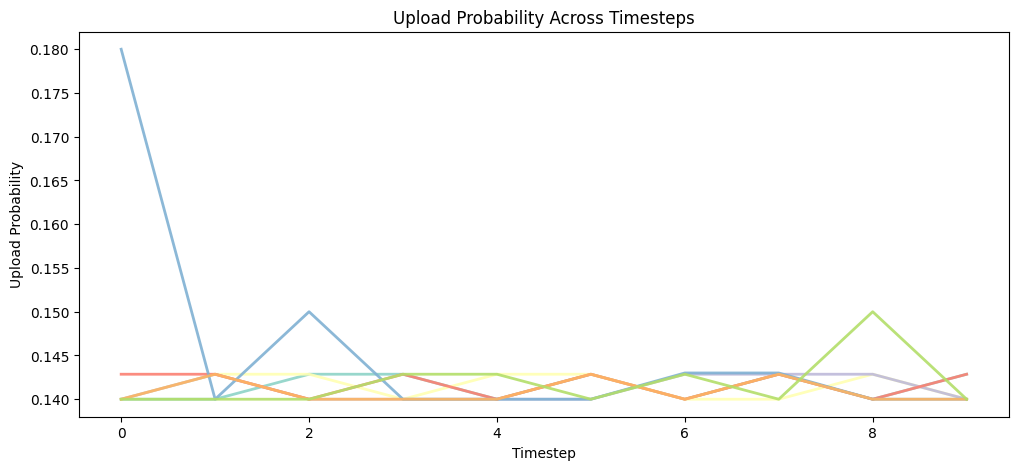

In [89]:
plt.figure(figsize=(12,5))
colors = plt.get_cmap("Set3")

for i, (cid, grp) in enumerate(heat_df.groupby("channel_id")):
    plt.plot(
        grp["timestep"],
        grp["probability"],
        color=colors(i % 8),
        alpha=0.9,
        linewidth=2
    )

plt.title("Upload Probability Across Timesteps")
plt.xlabel("Timestep")
plt.ylabel("Upload Probability")
plt.show()